# Building Regression Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_style('whitegrid')
sns.set_context('poster')
pd.options.display.max_columns = 30

In [2]:
all_teams = pd.read_csv('../data/all-teams-1990-2016.csv')

In [3]:
print all_teams.shape
print all_teams.isnull().sum()
print all_teams.dtypes
all_teams.tail(15)

(62415, 27)
date               0
team_x             0
opponent           0
div_rank           0
gb                 0
time               0
attendance         0
streak             0
double_header      0
runs_pg            0
runs_ma            0
runs_allowed_ma    0
ten_game           0
opening_day        0
total_games        0
win_pct            0
night_game         0
year               0
month              0
day                0
weekday            0
weekday_name       0
stadium            0
capacity           0
bat_age            0
pitch_age          0
division_game      0
dtype: int64
date                object
team_x              object
opponent            object
div_rank             int64
gb                 float64
time                object
attendance           int64
streak               int64
double_header        int64
runs_pg            float64
runs_ma            float64
runs_allowed_ma    float64
ten_game           float64
opening_day          int64
total_games          int64
win

,date,team_x,opponent,div_rank,gb,time,attendance,streak,double_header,runs_pg,runs_ma,runs_allowed_ma,ten_game,opening_day,total_games,win_pct,night_game,year,month,day,weekday,weekday_name,stadium,capacity,bat_age,pitch_age,division_game
62400,1996-07-30,SDP,ATL,1,1.5,0 days 02:23:00.000000000,24110,1,0,4.943925,6.8,5.8,0.6,0,107,0.532710,1,1996,7,30,1,Tuesday,Qualcomm Stadium,49639,30.9,28.7,0
62401,1996-07-31,SDP,ATL,1,1.5,0 days 02:39:00.000000000,24254,2,0,4.916667,6.4,4.8,0.6,0,108,0.537037,1,1996,7,31,2,Wednesday,Qualcomm Stadium,49639,30.9,28.7,0
62402,1996-08-01,SDP,ATL,1,0.5,0 days 03:16:00.000000000,24089,-1,0,4.908257,6.6,6.2,0.6,0,109,0.532110,0,1996,8,1,3,Thursday,Qualcomm Stadium,49639,30.9,28.7,0
62403,1996-04-24,SFG,ATL,3,-3.0,0 days 02:22:00.000000000,13296,-2,0,5.450000,6.6,7.8,0.3,0,20,0.500000,1,1996,4,24,2,Wednesday,Candlestick Park,58000,28.9,28.4,0
62404,1996-04-25,SFG,ATL,3,-4.0,0 days 02:12:00.000000000,12436,-3,0,5.333333,6.0,7.4,0.3,0,21,0.476190,0,1996,4,25,3,Thursday,Candlestick Park,58000,28.9,28.4,0
62405,1996-07-25,SFG,ATL,4,-10.0,0 days 02:06:00.000000000,16871,-2,0,4.740000,4.6,6.2,0.1,0,100,0.430000,1,1996,7,25,3,Thursday,Candlestick Park,58000,28.9,28.4,0
62406,1996-07-26,SFG,ATL,4,-9.0,0 days 02:51:00.000000000,17560,1,0,4.732673,4.0,5.6,0.2,0,101,0.435644,1,1996,7,26,4,Friday,Candlestick Park,58000,28.9,28.4,0
62407,1996-07-27,SFG,ATL,4,-10.0,0 days 02:26:00.000000000,38761,-1,0,4.696078,3.0,4.6,0.2,0,102,0.431373,0,1996,7,27,5,Saturday,Candlestick Park,58000,28.9,28.4,0
62408,1996-07-28,SFG,ATL,4,-10.0,0 days 03:04:00.000000000,34525,1,0,4.718447,3.8,5.2,0.3,0,103,0.436893,0,1996,7,28,6,Sunday,Candlestick Park,58000,28.9,28.4,0
62409,1996-04-26,STL,ATL,1,0.5,0 days 02:43:00.000000000,34598,-1,0,4.260870,5.0,7.4,0.4,0,23,0.521739,1,1996,4,26,4,Friday,Busch Memorial Stadium,57673,30.7,30.9,0


In [4]:
all_teams.date = pd.to_datetime(all_teams.date)
all_teams.drop(['date', 'time', 'weekday_name'], inplace=True, axis=1)

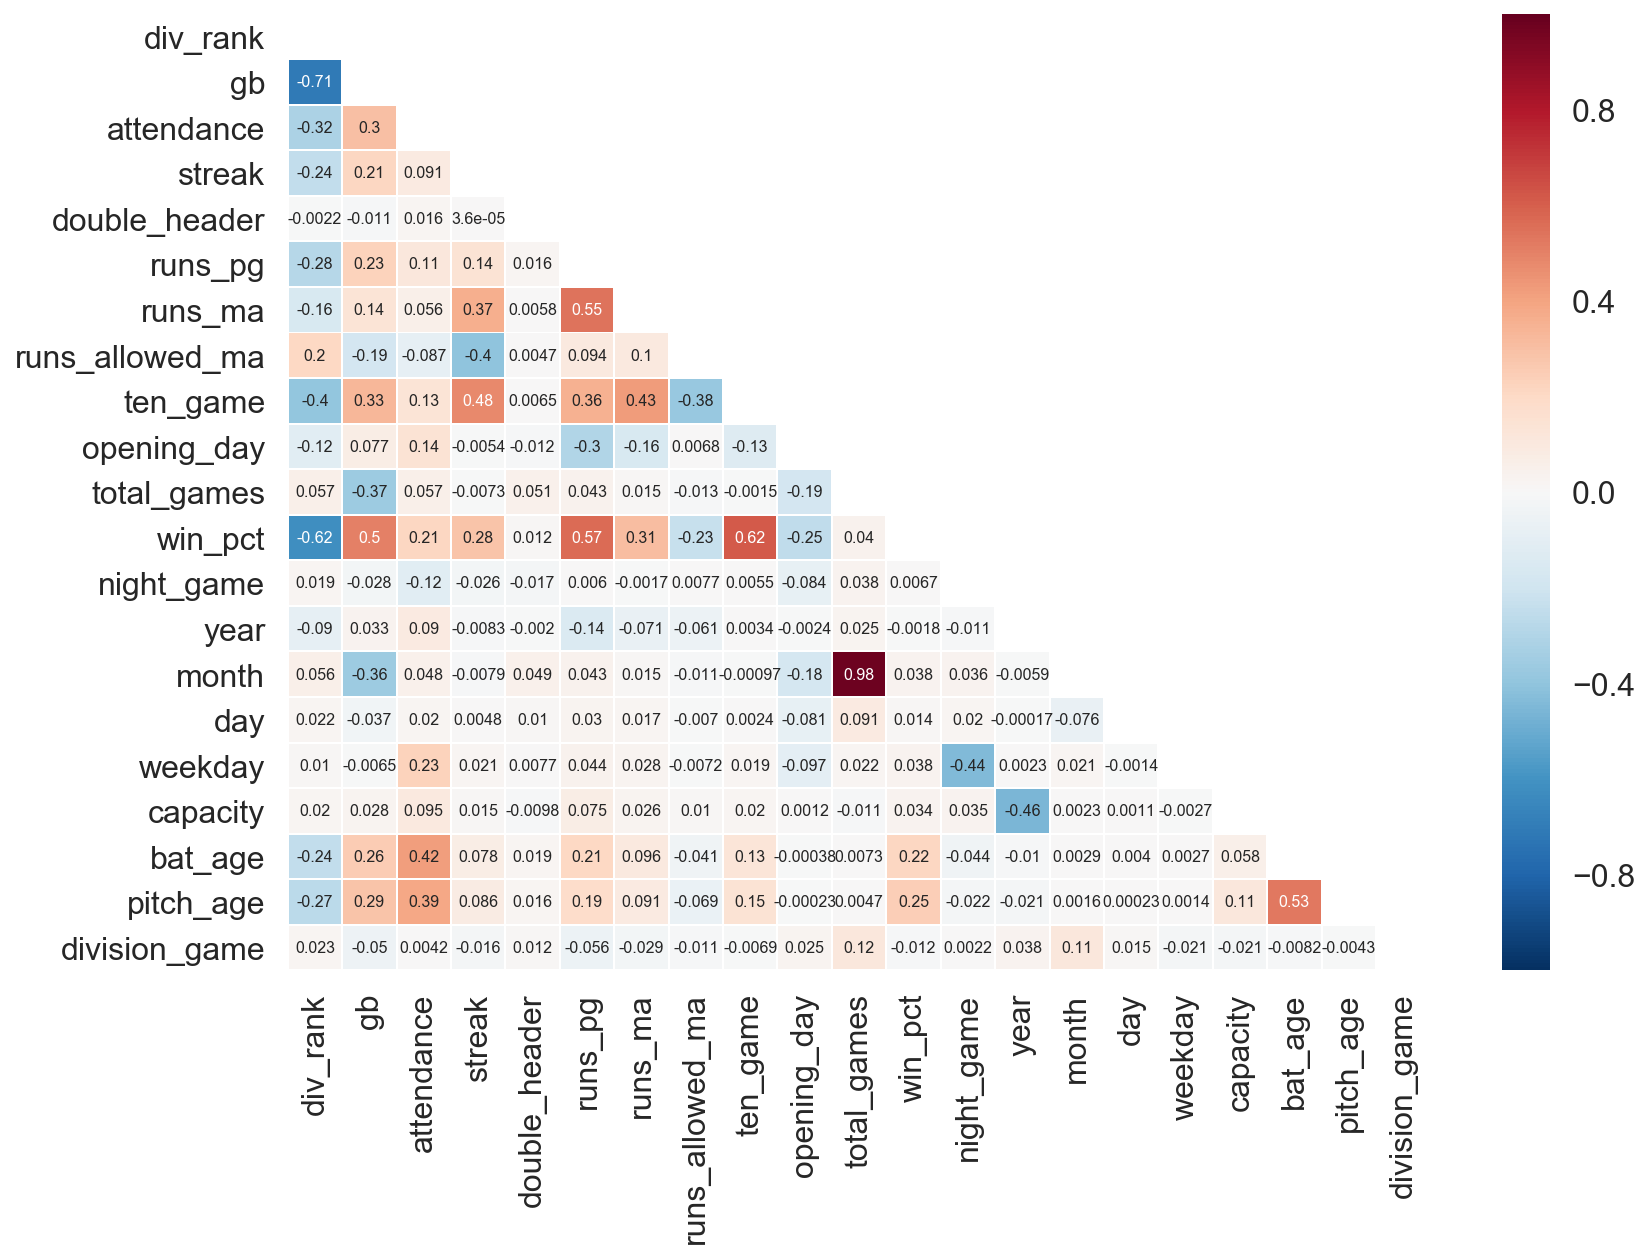

In [5]:
corr = all_teams.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, annot=True, linewidth=0.5, mask=mask, annot_kws={"size": 8})

### Creating variables for modeling, scaling data

In [26]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
import time

In [7]:
le = LabelEncoder()

all_teams['team_label'] = le.fit_transform(all_teams.team_x)
all_teams['opponent_label'] = le.fit_transform(all_teams.opponent)
all_teams['stadium_label'] = le.fit_transform(all_teams.stadium)

In [8]:
all_teams.head()

,team_x,opponent,div_rank,gb,attendance,streak,double_header,runs_pg,runs_ma,runs_allowed_ma,ten_game,opening_day,total_games,win_pct,night_game,year,month,day,weekday,stadium,capacity,bat_age,pitch_age,division_game,team_label,opponent_label,stadium_label
0,ANA,BOS,0,0.0,30874,0,0,0.000000,0.0,5.8,0.0,1,0,0.000000,1,1997,4,2,2,Angel Stadium,33851,29.7,28.3,0,0,4,1
1,ANA,BOS,3,-1.0,17323,-1,0,5.000000,5.0,5.8,0.0,0,1,0.000000,1,1997,4,3,3,Angel Stadium,33851,29.7,28.3,0,0,4,1
2,ANA,BOS,2,-2.5,24977,-3,0,5.273438,4.8,5.0,0.3,0,128,0.539062,1,1997,8,22,4,Angel Stadium,33851,29.7,28.3,0,0,4,1
3,ANA,BOS,2,-2.5,20994,1,0,5.294574,6.2,5.6,0.4,0,129,0.542636,0,1997,8,23,5,Angel Stadium,33851,29.7,28.3,0,0,4,1
4,ANA,BOS,2,-1.5,20733,2,0,5.300000,5.0,5.0,0.4,0,130,0.546154,0,1997,8,24,6,Angel Stadium,33851,29.7,28.3,0,0,4,1


In [9]:
X = all_teams.drop(['team_x', 'opponent', 'stadium', 'attendance'], axis = 1)
y = all_teams.attendance

In [10]:
ss = StandardScaler()
Xscaled = ss.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 86)

## Building Models

In [12]:
def evaluate(model):        
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    model_score = r2_score(y_test, pred)
    
    s = cross_val_score(model, X, y, cv=5, scoring='r2', n_jobs=-1)
        
    print "R^2 score:", model_score
    print "Cross Validation Score: {:0.5} ± {:0.5}".format(s.mean().round(5), s.std().round(5))
    
    df = pd.DataFrame(columns=['attendance', 'predictions', 'residuals'])
    df.attendance = y
    df.predictions = model.predict(X)
    df.residuals = df.attendance - df.predictions
    df.plot(x='predictions', y='residuals', kind='scatter')
    plt.show()

In [13]:
def feat_imp(model):
    feature_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns=['importance']
                                      ).sort_values('importance', ascending=False)
    print feature_importances

In [31]:
rf = RandomForestRegressor(n_estimators=300)

R^2 score: 0.787310883537
Cross Validation Score: 0.61456 ± 0.03459


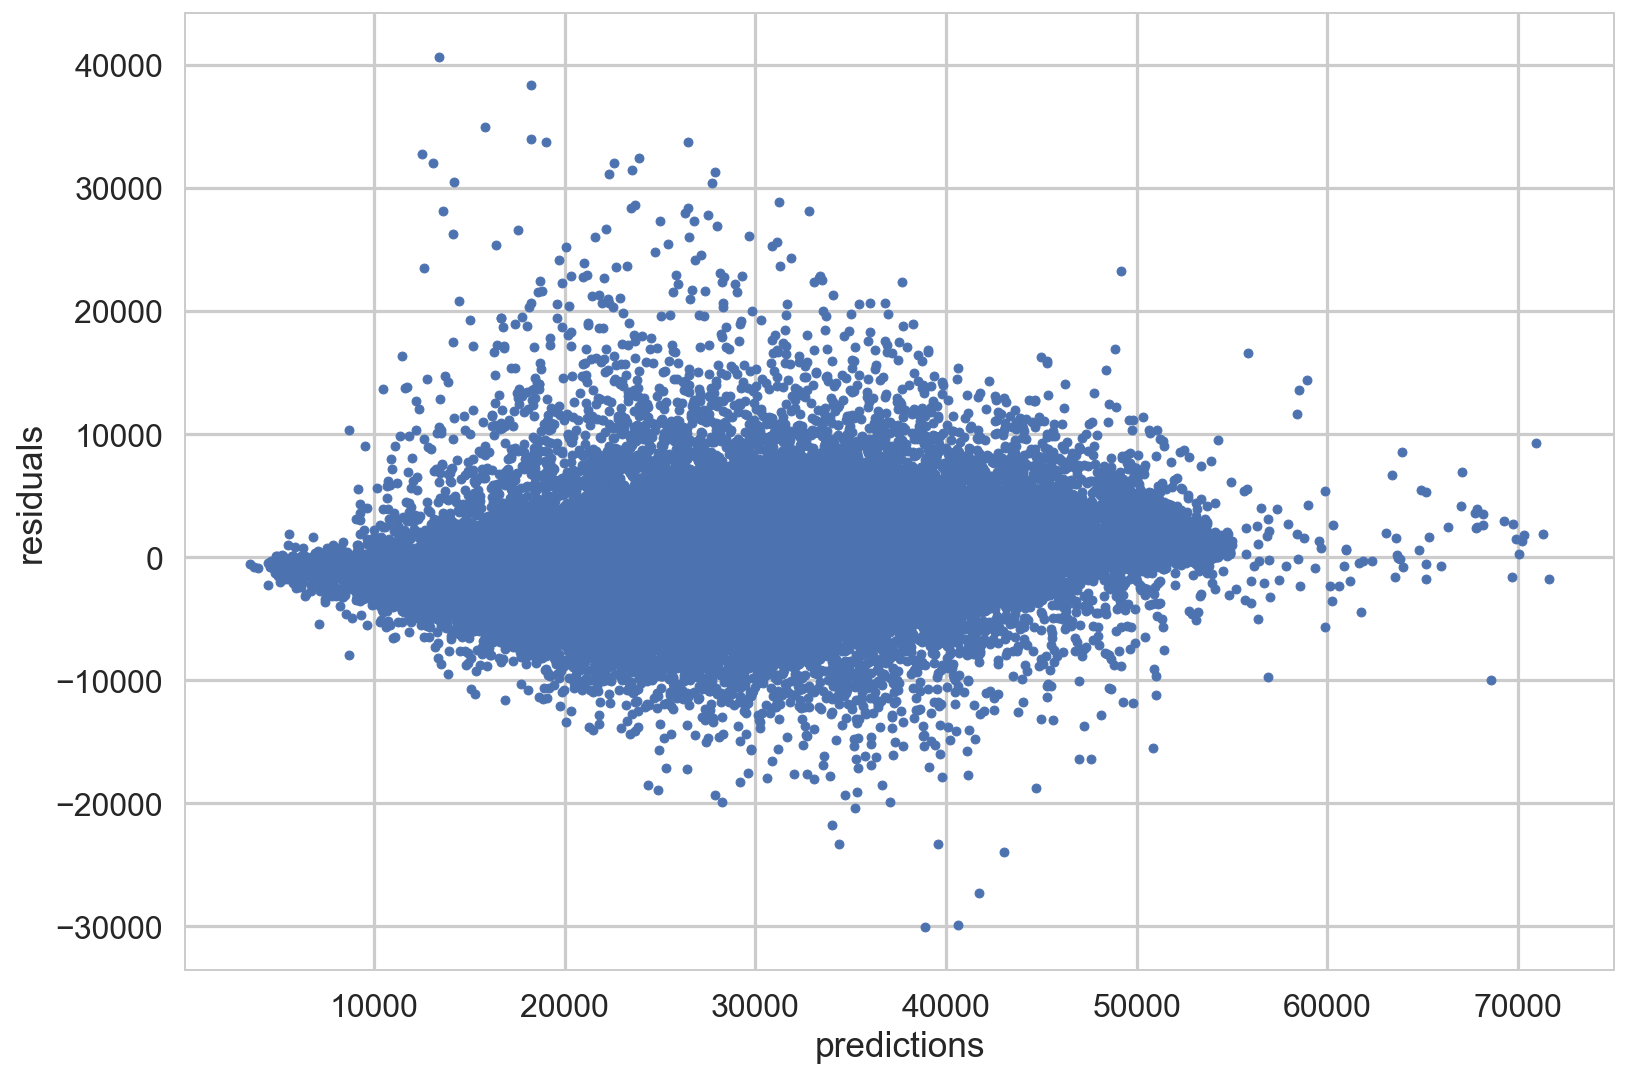

CPU times: user 3min 10s, sys: 2.54 s, total: 3min 12s
Wall time: 10min


In [32]:
%time evaluate(rf)

In [40]:
feat_imp(rf)

                 importance
bat_age            0.171162
capacity           0.099384
pitch_age          0.093234
stadium_label      0.092695
weekday            0.080529
year               0.062735
total_games        0.057244
team_label         0.055278
win_pct            0.052343
runs_pg            0.039344
gb                 0.034151
opening_day        0.026571
opponent_label     0.022272
day                0.021690
runs_allowed_ma    0.020162
runs_ma            0.019891
div_rank           0.013204
streak             0.011858
ten_game           0.010704
month              0.006195
night_game         0.005201
division_game      0.003328
double_header      0.000826


In [34]:
def rf_gs():
    params = {
        'max_features' : [0.5, 0.75, 'auto', 'sqrt'],
        'max_depth' : [20, 30, None],
    }

    gs_rf = GridSearchCV(rf, params, n_jobs=-1, cv=5)
    gs_rf.fit(X_train, y_train)

    print gs_rf.best_params_

In [35]:
%time rf_gs()

{'max_features': 0.5, 'max_depth': None}
CPU times: user 1min 33s, sys: 2.12 s, total: 1min 35s
Wall time: 27min 41s


In [36]:
rf_best_params = RandomForestRegressor(n_estimators=300, max_features=0.5, max_depth=None)

R^2 score: 0.789705500479
Cross Validation Score: 0.63574 ± 0.03284


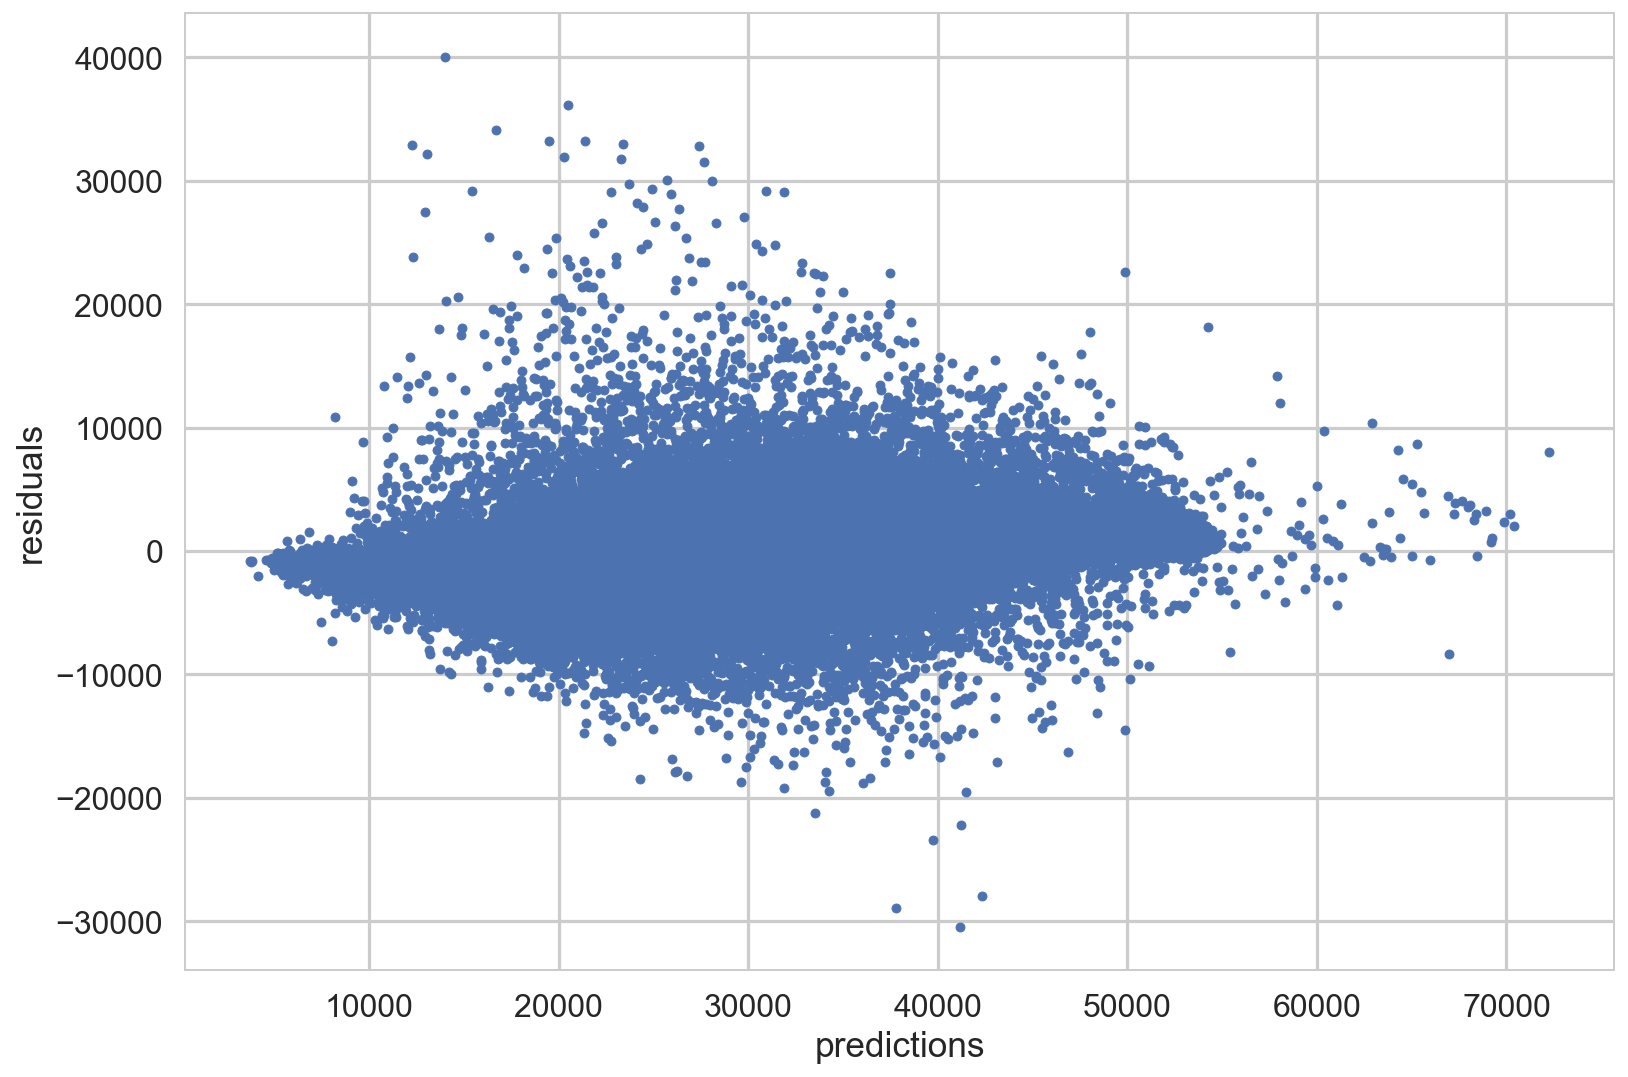

CPU times: user 1min 41s, sys: 1.65 s, total: 1min 42s
Wall time: 4min 52s


In [37]:
%time evaluate(rf_best_params)

In [41]:
feat_imp(rf_best_params)

                 importance
bat_age            0.136707
pitch_age          0.115066
stadium_label      0.092676
capacity           0.091443
weekday            0.081229
year               0.059900
team_label         0.057974
win_pct            0.057442
total_games        0.052239
runs_pg            0.041105
gb                 0.034083
div_rank           0.026757
opponent_label     0.021748
day                0.021431
runs_ma            0.020929
runs_allowed_ma    0.020419
opening_day        0.020237
month              0.014440
streak             0.012533
ten_game           0.011685
night_game         0.005466
division_game      0.003662
double_header      0.000829


### Linear Model

In [36]:
X = all_teams.drop(['team_x', 'opponent', 'stadium', 'attendance'], axis = 1)
y = all_teams.attendance

In [37]:
ss = StandardScaler()
Xscaled = ss.fit_transform(X)

In [38]:
X = add_constant(X)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 86)

In [41]:
lin_model = OLS(y_train, X_train).fit()

In [44]:
lin_pred = lin_model.predict(X_test)
lin_model_score = r2_score(y_test, lin_pred)

print "R^2 score:", lin_model_score

R^2 score: 0.383435113379


In [46]:
lin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             attendance   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     1127.
Date:                Tue, 23 May 2017   Prob (F-statistic):               0.00
Time:                        16:42:52   Log-Likelihood:            -4.5989e+05
No. Observations:               43690   AIC:                         9.198e+05
Df Residuals:                   43666   BIC:                         9.200e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -4.906e+05   1.44e+04    -34.133      0.000   -5.19e+05   -4.62e+05
div_rank         -409.5437     47.489     -8.624      0.000    -502.623    -316.465
gb                196.9711      8.089     24.351      0.000     181.117     212.825
streak            -55.9153     21.367     -2.617      0.009     -97.796     -14.035
double_header     209.9118    339.621      0.618      0.537    -455.752     875.575
runs_pg            83.4124     74.169      1.125      0.261     -61.960     228.785
runs_ma            86.5462     37.873      2.285      0.022      12.314     160.778
runs_allowed_ma  -145.6881     35.189     -4.140      0.000    -214.660     -76.716
ten_game         -566.0168    356.557     -1.587      0.112   -1264.874     132.840
opening_day      1.897e+04    443.181     42.793      0.000    1.81e+04    1.98e+04
total_games        55.5765     10.989      5.057      0.000      34.037      77.116
win_pct          2627.6384    682.960      3.847      0.000    1289.024    3966.253
night_game        442.3610    104.602      4.229      0.000     237.339     647.383
year              203.4812      6.846     29.722      0.000     190.062     216.900
month            -611.0696    298.103     -2.050      0.040   -1195.358     -26.781
day                17.0961     10.794      1.584      0.113      -4.060      38.252
weekday          1478.5905     24.608     60.087      0.000    1430.359    1526.822
capacity            0.1975      0.007     29.981      0.000       0.185       0.210
bat_age          2251.7860     39.550     56.935      0.000    2174.267    2329.305
pitch_age        1316.6230     37.138     35.452      0.000    1243.832    1389.414
division_game       1.5756     88.356      0.018      0.986    -171.604     174.755
team_label        -73.6370      4.510    -16.328      0.000     -82.477     -64.797
opponent_label    -22.6300      4.440     -5.097      0.000     -31.332     -13.928
stadium_label     -77.0136      2.884    -26.702      0.000     -82.667     -71.361
==============================================================================
Omnibus:                      393.157   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              404.062
Skew:                           0.231   Prob(JB):                     1.82e-88
Kurtosis:                       3.088   Cond. No.                     1.58e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Gradient Boosting

In [67]:
X = all_teams.drop(['team_x', 'opponent', 'stadium', 'attendance'], axis = 1)
y = all_teams.attendance

In [68]:
ss = StandardScaler()
Xscaled = ss.fit_transform(X)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 86)

In [47]:
gbr = GradientBoostingRegressor()

R^2 score: 0.621126915597
Cross Validation Score: 0.54032 ± 0.04105


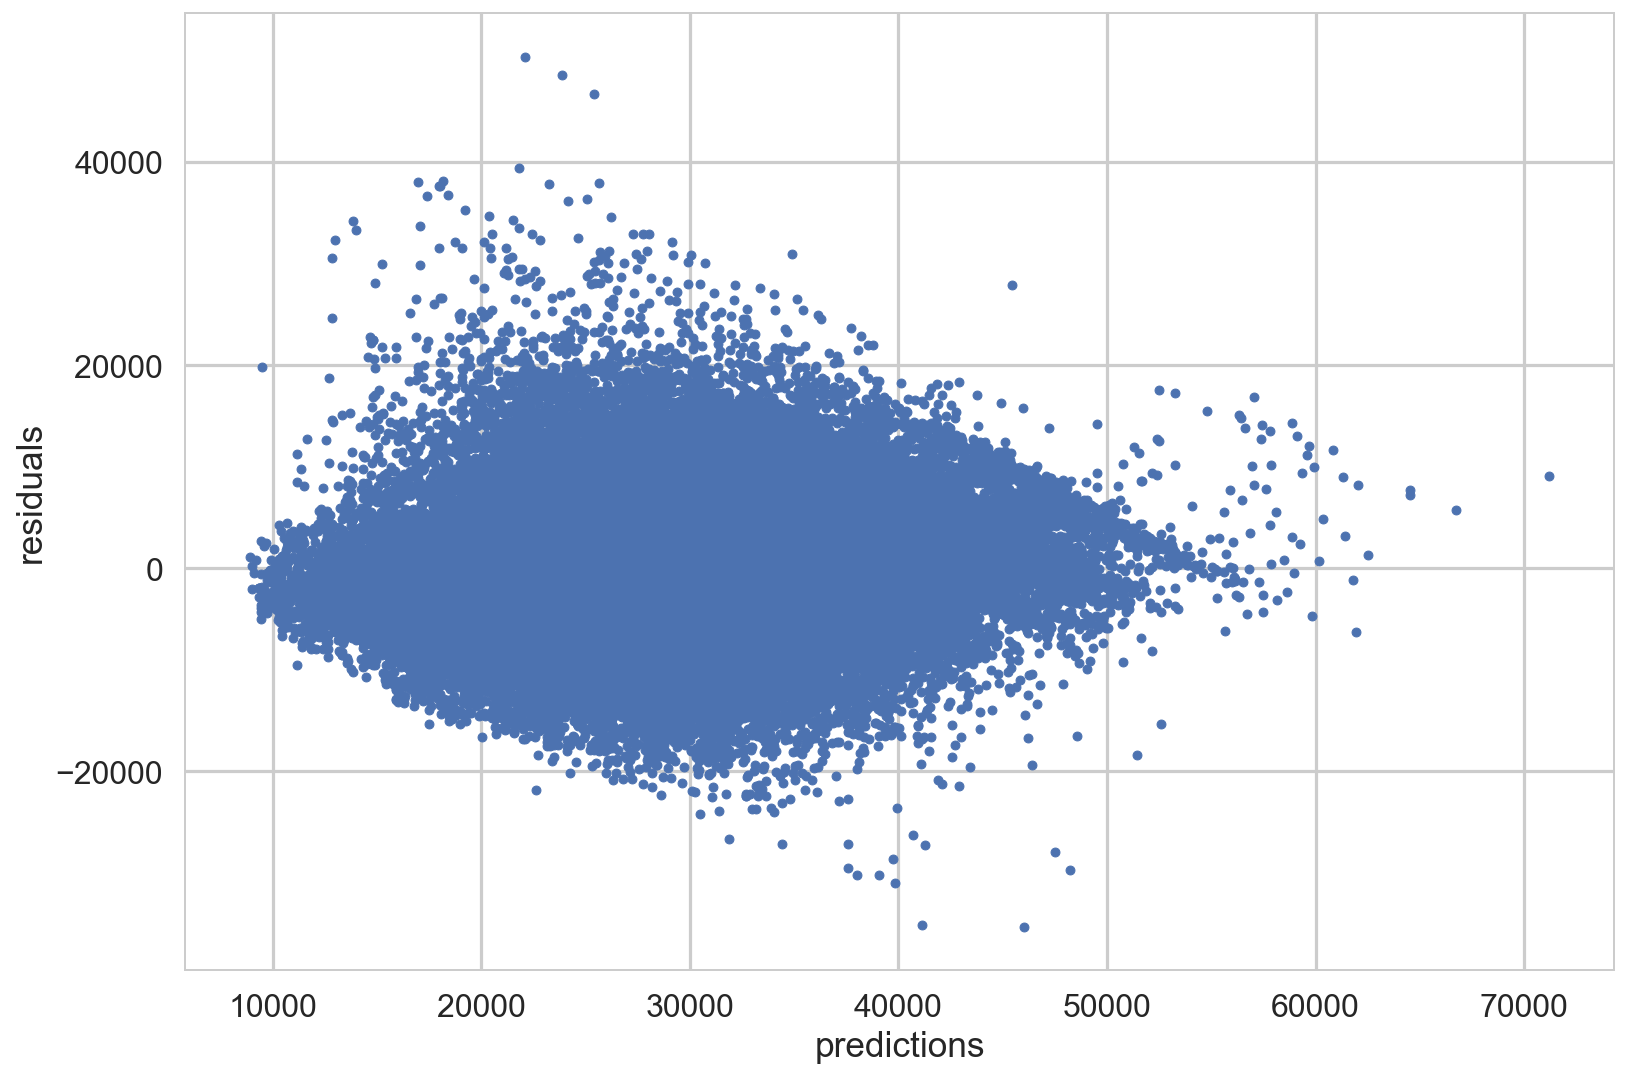

CPU times: user 6.05 s, sys: 127 ms, total: 6.18 s
Wall time: 15.3 s


In [48]:
%time evaluate(gbr)

In [53]:
def gbr_gs():
    params = {
        'max_features' : [0.5, 0.75, 'auto', 'sqrt'],
        'max_depth' : [3, 5, 8, 15],
    }

    gs_gbr = GridSearchCV(gbr, params, n_jobs=-1, cv=5)
    gs_gbr.fit(X_train, y_train)

    print gs_gbr.best_params_

In [54]:
%time gbr_gs()

{'max_features': 'auto', 'max_depth': 8}
CPU times: user 44.5 s, sys: 1.02 s, total: 45.5 s
Wall time: 37min 14s


In [55]:
gbr_best_params = GradientBoostingRegressor(max_features='auto', max_depth=8)

R^2 score: 0.808488600281
Cross Validation Score: 0.67818 ± 0.0441


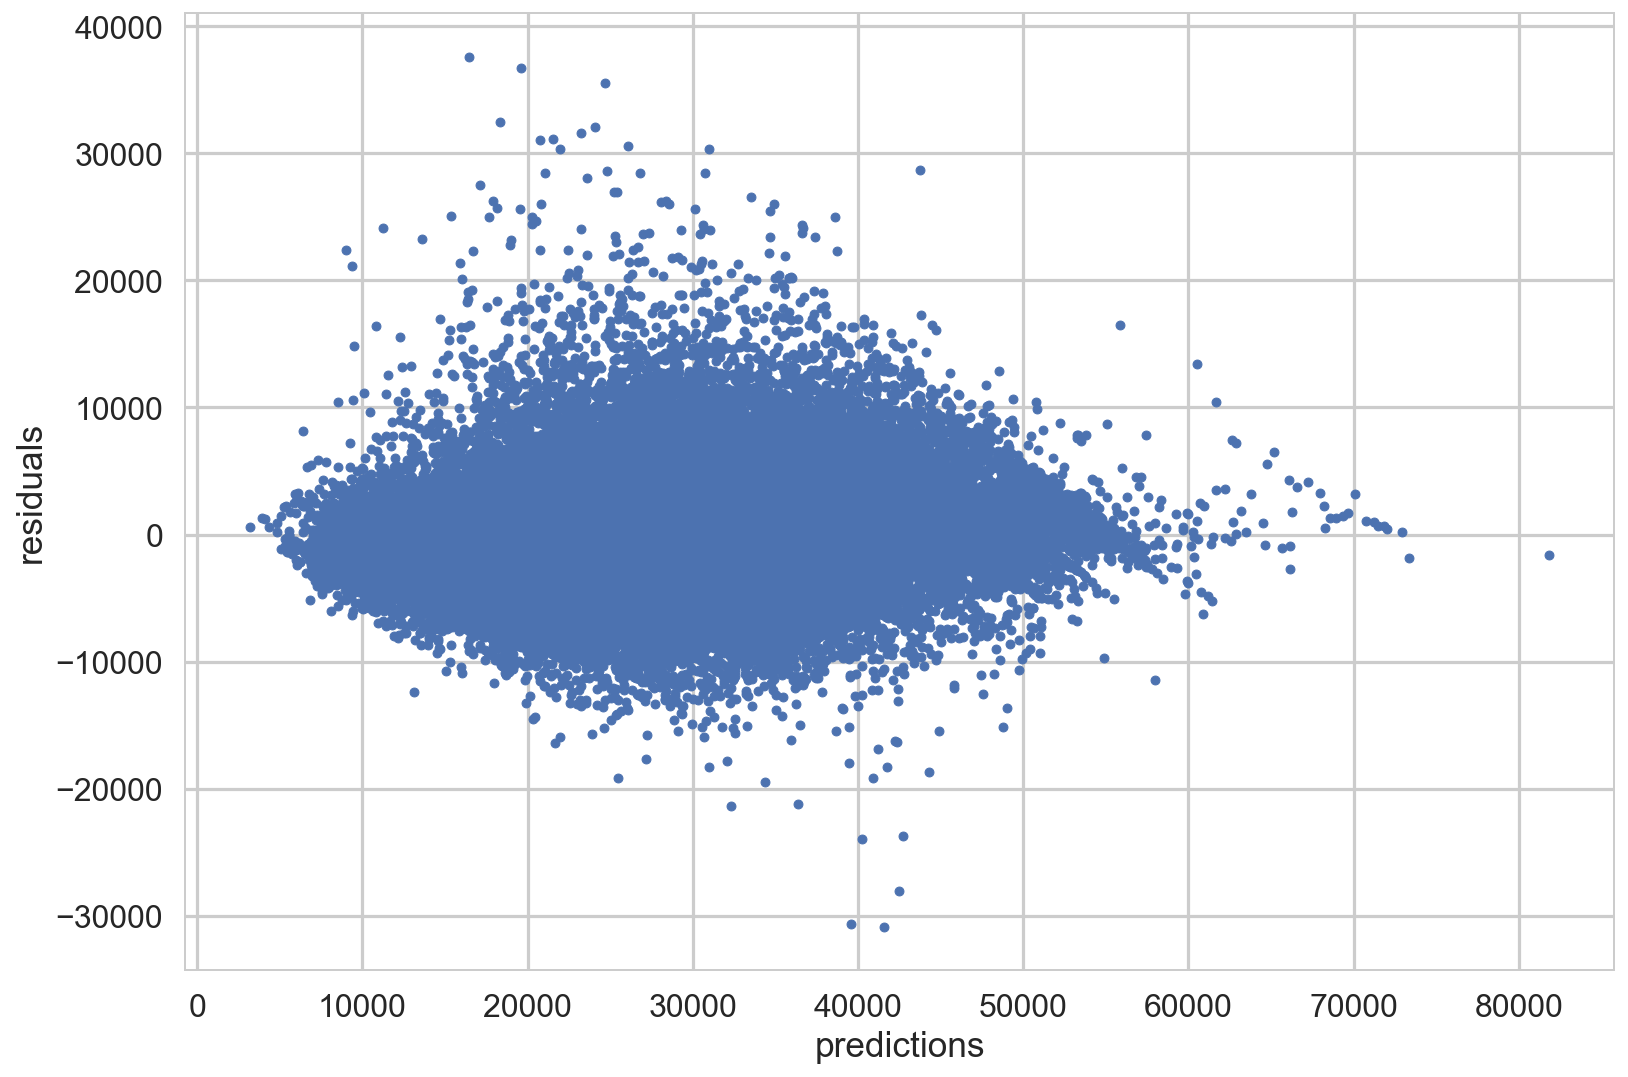

CPU times: user 41.6 s, sys: 253 ms, total: 41.9 s
Wall time: 1min 44s


In [56]:
%time evaluate(gbr_best_params)

In [70]:
# adjust parameters

In [71]:
gbr_best_params = GradientBoostingRegressor(n_estimators=500, max_features='auto', max_depth=10)

R^2 score: 0.832741400823
Cross Validation Score: 0.67426 ± 0.05027


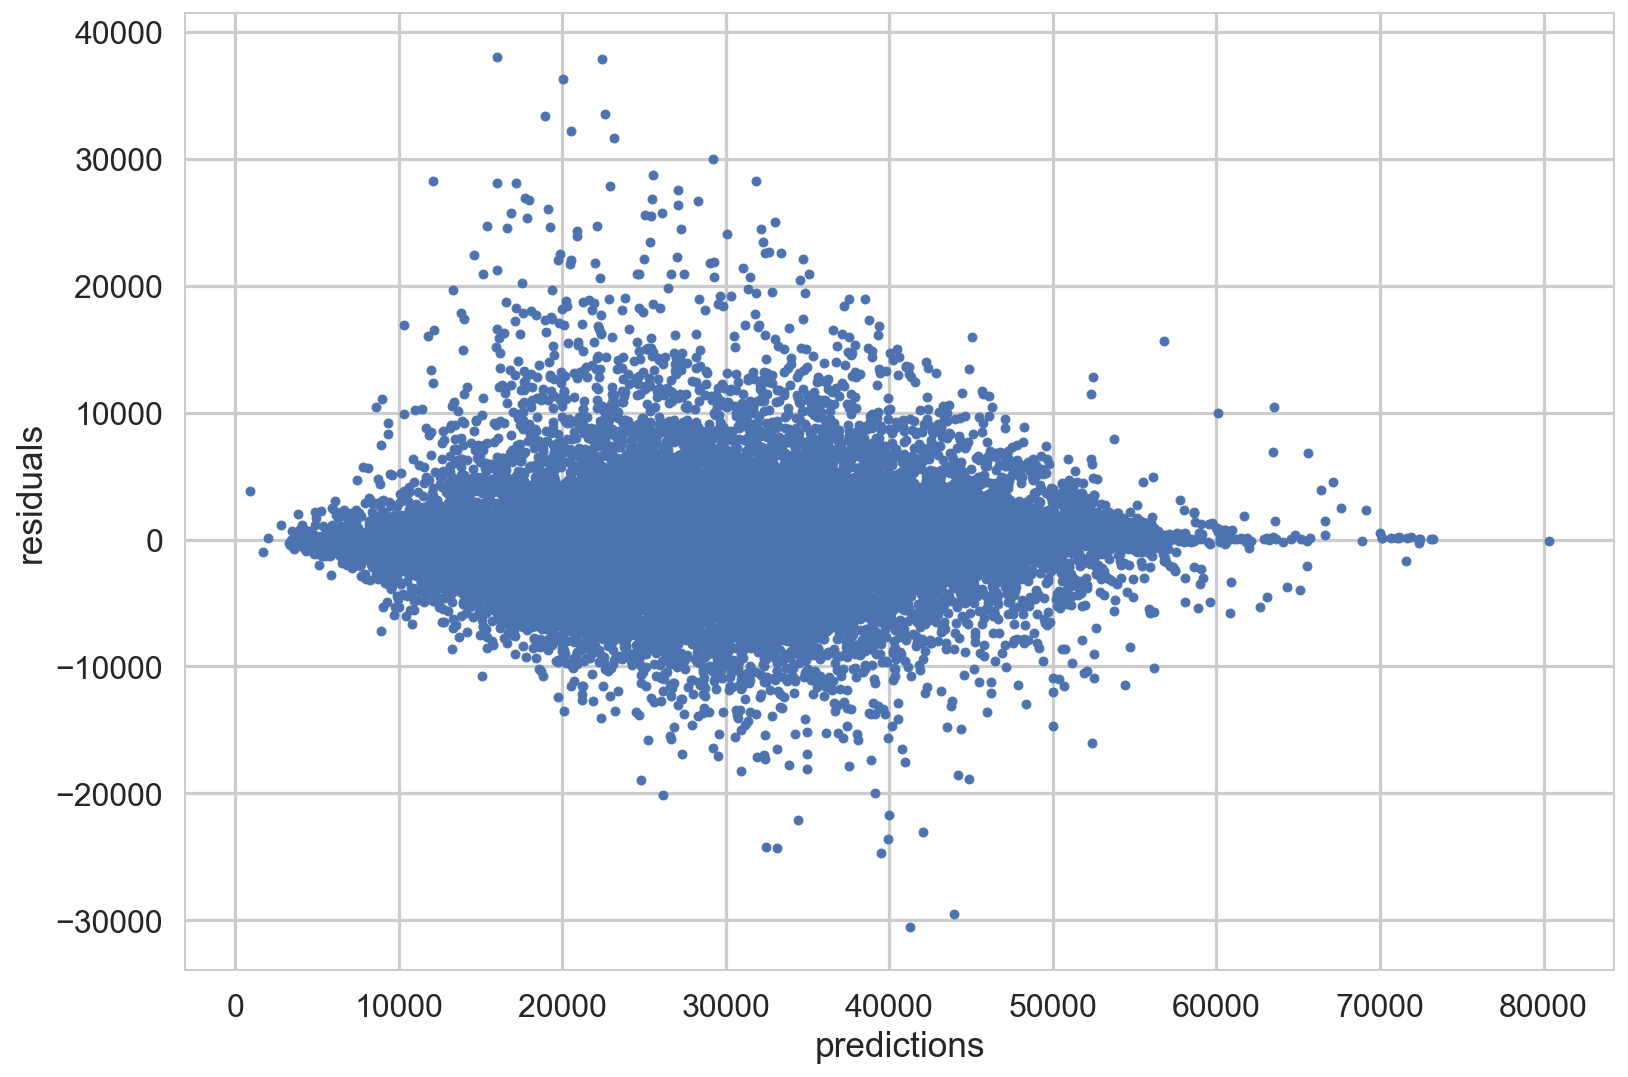

CPU times: user 6min 42s, sys: 2.68 s, total: 6min 45s
Wall time: 16min 50s


In [72]:
%time evaluate(gbr_best_params)

In [73]:
feat_imp(gbr_best_params)

                 importance
runs_pg            0.114015
win_pct            0.094294
total_games        0.074619
capacity           0.062055
runs_allowed_ma    0.056808
gb                 0.056046
runs_ma            0.055858
opponent_label     0.055140
day                0.054903
bat_age            0.051273
year               0.050850
pitch_age          0.048901
team_label         0.043634
stadium_label      0.040365
weekday            0.039946
streak             0.033443
ten_game           0.026094
div_rank           0.014368
night_game         0.009654
division_game      0.007271
month              0.007040
opening_day        0.002104
double_header      0.001316
